<a href="https://colab.research.google.com/github/wayaadhyasta/Studi-Kasus-Machine-Learning/blob/main/pengangguran2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/Data Penduduk Bekerja dan Pengangguran.csv')
dt

,Tanggal,Jumlah Penduduk Bekerja,Jumlah Pengangguran
0,2/1/2011,"11,204,588","837,988"
1,8/1/2011,"10,741,631","868,139"
2,2/1/2012,"11,406,198","775,783"
3,8/1/2012,"11,250,487","734,487"
4,2/1/2013,"11,592,961","724,090"
5,8/1/2013,"11,276,107","741,093"
6,2/1/2014,"11,816,992","714,707"
7,8/1/2014,"11,462,803","724,491"
8,2/1/2015,"12,084,682","745,477"
9,8/1/2015,"11,481,920","756,082"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dt['Tanggal'] = pd.to_datetime(dt['Tanggal'])

# Ekstrak Tahun dan Bulan dari Tanggal
dt['Tahun'] = dt['Tanggal'].dt.year
dt['Bulan'] = dt['Tanggal'].dt.month

# Tampilkan data untuk konfirmasi
print(dt.head())

     Tanggal Jumlah Penduduk Bekerja  Jumlah Pengangguran  Year  Month  Day  \
0 2011-02-01              11,204,588             837988.0  2011      2    1   
1 2011-08-01              10,741,631             868139.0  2011      8    1   
2 2012-02-01              11,406,198             775783.0  2012      2    1   
3 2012-08-01              11,250,487             734487.0  2012      8    1   
4 2013-02-01              11,592,961             724090.0  2013      2    1   

   Tahun  Bulan  
0   2011      2  
1   2011      8  
2   2012      2  
3   2012      8  
4   2013      2  


In [ ]:
# Hapus koma pada kolom numerik lalu konversi ke float
dt['Jumlah Penduduk Bekerja'] = dt['Jumlah Penduduk Bekerja'].astype(str).str.replace(',', '').astype(float)
dt['Jumlah Pengangguran'] = dt['Jumlah Pengangguran'].astype(str).str.replace(',', '').astype(float)


In [ ]:
print(dt.dtypes)
print(dt.head())


Tanggal                    datetime64[ns]
Jumlah Penduduk Bekerja           float64
Jumlah Pengangguran               float64
Year                                int32
Month                               int32
Day                                 int32
Tahun                               int32
Bulan                               int32
dtype: object
     Tanggal  Jumlah Penduduk Bekerja  Jumlah Pengangguran  Year  Month  Day  \
0 2011-02-01               11204588.0             837988.0  2011      2    1   
1 2011-08-01               10741631.0             868139.0  2011      8    1   
2 2012-02-01               11406198.0             775783.0  2012      2    1   
3 2012-08-01               11250487.0             734487.0  2012      8    1   
4 2013-02-01               11592961.0             724090.0  2013      2    1   

   Tahun  Bulan  
0   2011      2  
1   2011      8  
2   2012      2  
3   2012      8  
4   2013      2  


In [ ]:
dt.head()

,Tanggal,Jumlah Penduduk Bekerja,Jumlah Pengangguran,Year,Month,Day,Tahun,Bulan
0,2011-02-01,11204588.0,837988.0,2011,2,1,2011,2
1,2011-08-01,10741631.0,868139.0,2011,8,1,2011,8
2,2012-02-01,11406198.0,775783.0,2012,2,1,2012,2
3,2012-08-01,11250487.0,734487.0,2012,8,1,2012,8
4,2013-02-01,11592961.0,724090.0,2013,2,1,2013,2


In [ ]:
dt.tail()

,Tanggal,Jumlah Penduduk Bekerja,Jumlah Pengangguran,Year,Month,Day,Tahun,Bulan
20,2021-02-01,13106431.0,874601.0,2021,2,1,2021,2
21,2021-08-01,13105052.0,910205.0,2021,8,1,2021,8
22,2022-02-01,13561190.0,840215.0,2022,2,1,2022,2
23,2022-08-01,13529671.0,842593.0,2022,8,1,2022,8
24,2023-02-01,13863251.0,798928.0,2023,2,1,2023,2


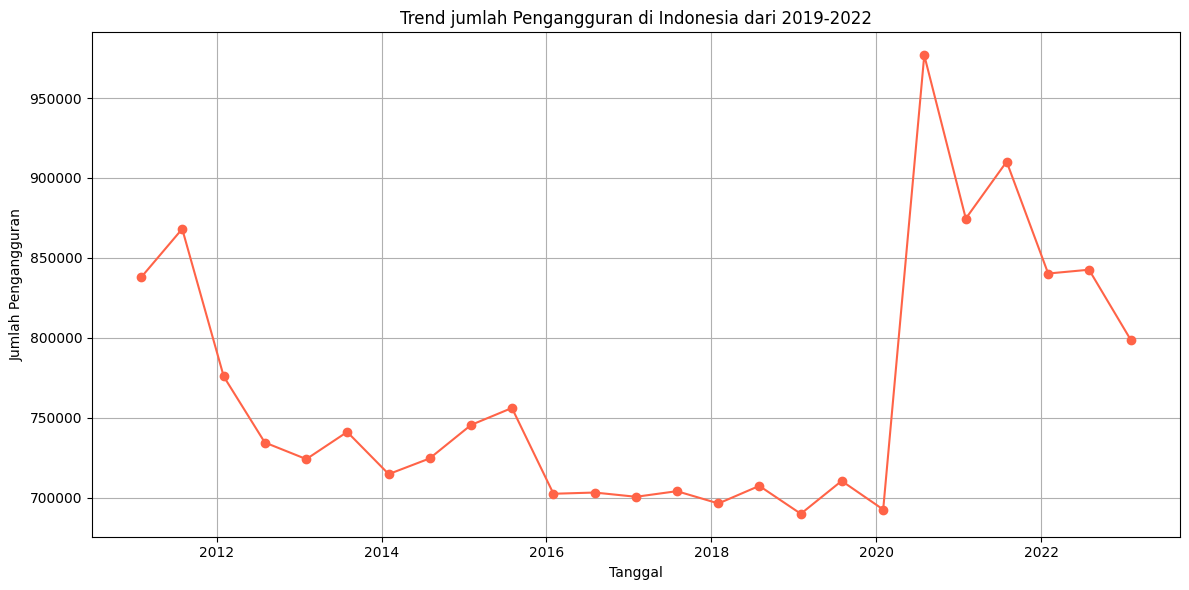

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dt['Tanggal'], dt['Jumlah Pengangguran'], marker='o', color='tomato')
plt.title('Trend jumlah Pengangguran di Indonesia dari 2019-2022')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengangguran')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-52-449901112fe6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tanggal', y='Jumlah Pengangguran', data=pengangguran_tahunan, palette='coolwarm')


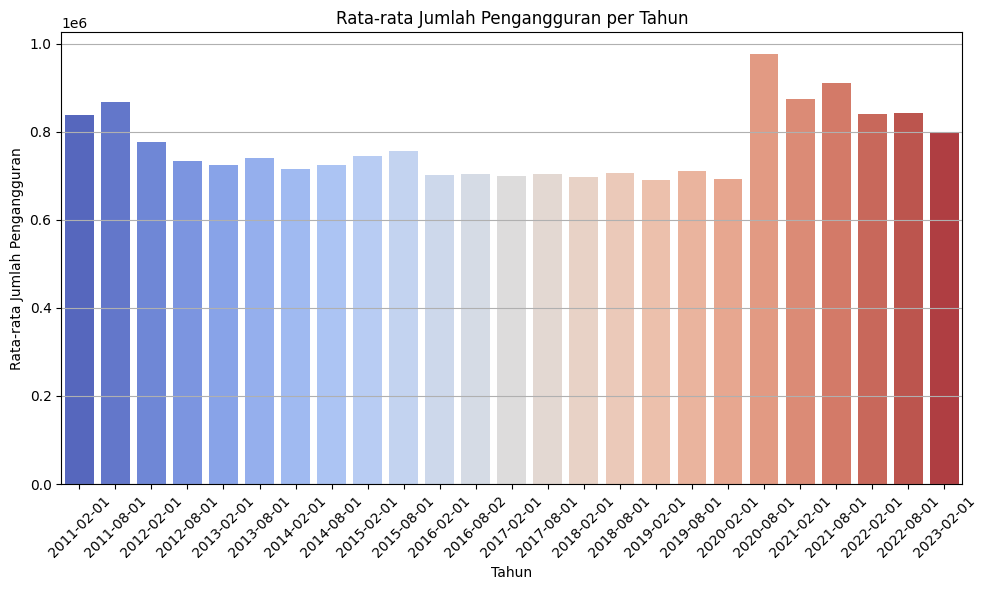

In [ ]:
dt['Jumlah Pengangguran'] = pd.to_numeric(dt['Jumlah Pengangguran'], errors='coerce')
pengangguran_tahunan = dt.groupby('Tanggal')['Jumlah Pengangguran'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Tanggal', y='Jumlah Pengangguran', data=pengangguran_tahunan, palette='coolwarm')
plt.title('Rata-rata Jumlah Pengangguran per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Pengangguran')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
X = dt[['Tahun', 'Bulan', 'Jumlah Penduduk Bekerja']]
y = dt['Jumlah Pengangguran']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
xgb = XGBRegressor(n_estimators=50, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:
allresult = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest','XGBoost'],
    'MSE':[mse_lr, mse_rf, mse_xgb],
    'R2':[r2_lr, r2_rf, r2_xgb]
})
print('Hasil Evaluasi Model')
print(allresult)

Hasil Evaluasi Model
               Model           MSE        R2
0  Linear Regression  8.417969e+09 -0.986577
1      Random Forest  7.707824e+08  0.818101
2            XGBoost  4.829455e+08  0.886029


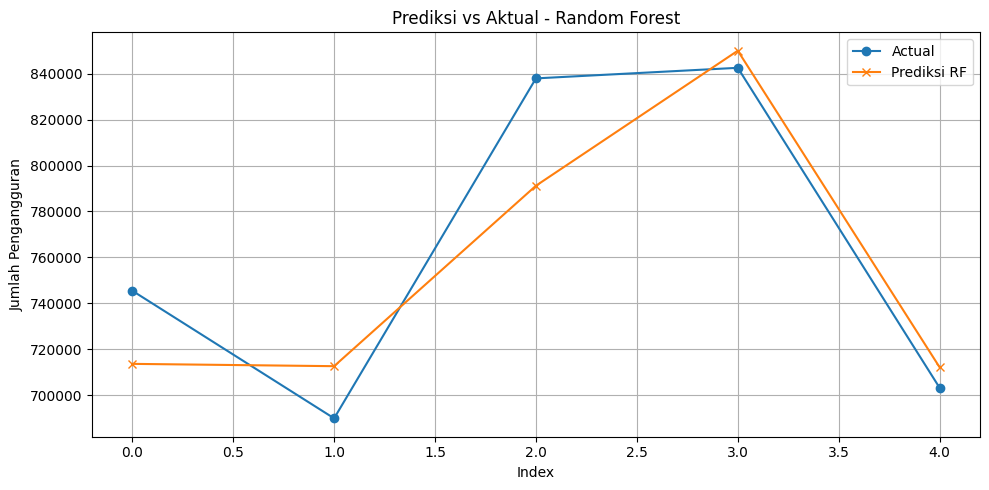

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_rf, label='Prediksi RF', marker='x')
plt.title('Prediksi vs Aktual - Random Forest')
plt.xlabel('Index')
plt.ylabel('Jumlah Pengangguran')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
future_input = pd.DataFrame({
    'Tahun': [2023],
    'Bulan': [2],
    'Jumlah Penduduk Bekerja': [5000000]

})
future_prend = rf.predict(future_input)
print(f'Prediksi Jumlah pengangguran di Feb 2023: {int(future_prend[0])}orang')

Prediksi Jumlah pengangguran di Feb 2023: 867721orang
